# Mission Abengers_Core

### 다음 질문에 답하시오.
캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 **수치의 합**이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

### 데이터 불러오기

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stats_df = pd.read_csv('./charcters_stats.csv')

In [70]:
stats_df

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [196]:
stats_df.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


In [197]:
stats_df.mean()

new_stats_df = stats_df.set_index('Name')
new_stats_df
new_stats_df.loc[:, new_stats_df.columns != 'Total']

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
Name,,,,,,,
3-D Man,good,50,31,43,32,25,52
A-Bomb,good,38,100,17,80,17,64
Abe Sapien,good,88,14,35,42,35,85
Abin Sur,good,50,90,53,64,84,65
Abomination,bad,63,80,53,90,55,95
...,...,...,...,...,...,...,...
Yellowjacket,good,88,10,12,28,12,14
Yellowjacket II,good,50,10,35,28,31,28
Ymir,good,50,100,27,100,83,28


## 능력마다 분산이 다름. z scoring 한 값으로 대체하면 어떨까요?

In [207]:
stats_mean = new_stats_df.mean()
stats_std = new_stats_df.std()


z_scored = (new_stats_df - stats_means) / stats_std
# z_scored = z_scored.loc[:, z_scored.columns != 'Total']

z_scored['Total'] = z_scored.loc[:].sum(axis=1)
z_scored[z_scored['Total'] == z_scored['Total'].max()]
z_scored['Alignment'] = stats_df['Alignment']
# z_scored.loc[:, z_scored['Total'] == z_scored['Total'].max()]

## 기존의 데이터를 이용했을 때는??

In [224]:
stats_df[stats_df['Total'] == stats_df['Total'].max()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


## 데이터 시각화하기

In [232]:
good_chart = stats_df[stats_df['Alignment'] == 'good']['Total']
bad_chart = stats_df[stats_df['Alignment'] == 'bad']['Total']
neut_chart = stats_df[stats_df['Alignment'] == 'neutral']['Total']

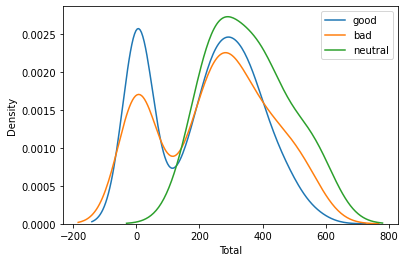

In [236]:
# 확률밀도함수?

sns.kdeplot(data=good_chart)
sns.kdeplot(data=bad_chart)
sns.kdeplot(data=neut_chart)
plt.legend(['good', 'bad', 'neutral'])
plt.show()

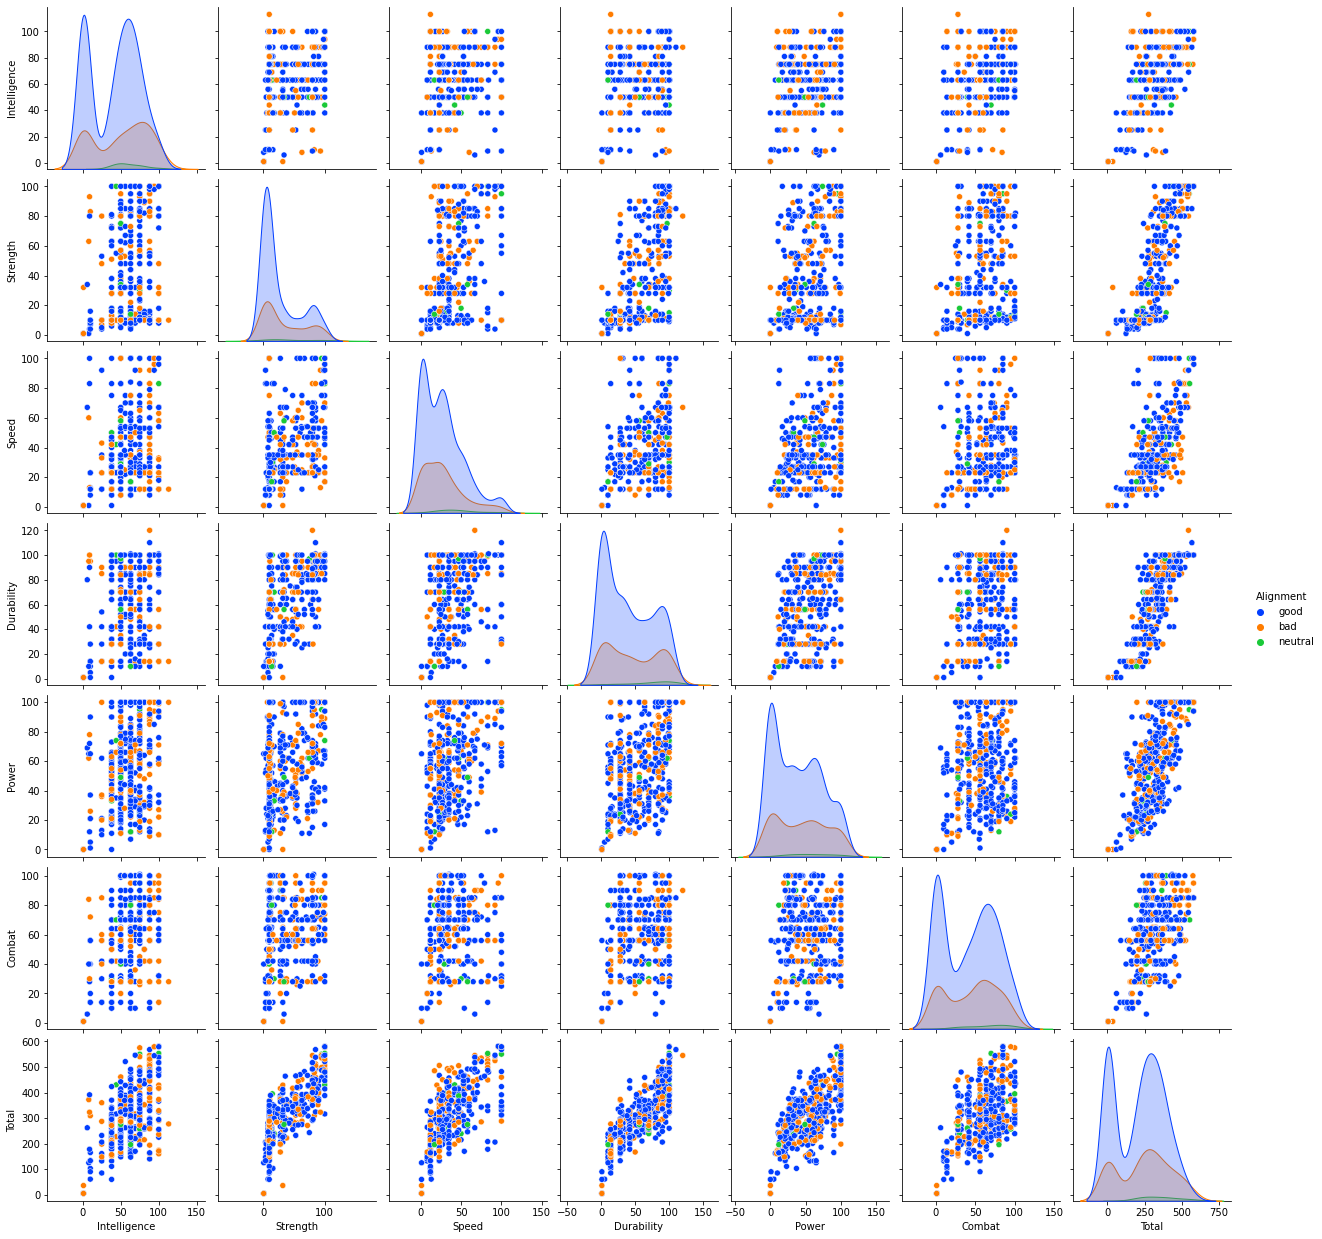

In [245]:
# pairplot?

sns.pairplot(stats_df, diag_kind='kde', hue='Alignment', palette='bright')

plt.show()


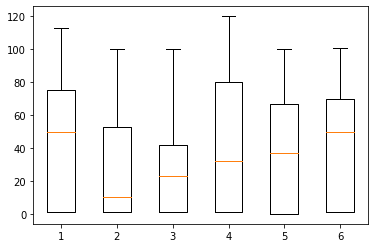

In [259]:
# plt.boxplot
plt.boxplot(stats_df.loc[:,'Intelligence':'Combat'])
plt.show()

In [326]:
# scatter
scat_df = stats_df.loc[:, 'Intelligence':'Combat']
print(type(scat_df['Intelligence']))
# plt.scatter(x='In', axis=scat_df.columns)
# scat_df.plot(kind='scatter', x=scat_df.columns, y='Intelligence')

# scat_df.loc[:, ('Intelligence','Alignment')]
# a =sns.swarmplot(x='Intelligence')
# tips = sns.load_dataset("tips")
# tips

scat_df.index
for i in scat_df.index:
    for 

<class 'pandas.core.series.Series'>
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
26

# Mission Abengers_Extra